In [134]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM
import numpy as np
import matplotlib.pyplot as plt

### Training data

In [85]:
# 讀 training data
f = open(r"D:\Users\user\Desktop\碩班課程\資料探勘\HW4\training_label.txt",'r',encoding = 'utf8')
lines=f.readlines()

In [86]:
#regularize reviews to lower
lines=[x.lower() for x in lines]

label=[int(l.split('+++$+++')[0]) for l in lines]

corpus=[l for x in lines for l in x.split('+++$+++')[1:]]
corpus=[l.split('\n')[0] for l in corpus]
corpus[0]

' are wtf ... awww thanks !'

In [87]:
maxlen=max(len(cor) for cor in corpus) 

In [88]:
#tokenize reviews
tokens=[nltk.word_tokenize(x) for x in corpus]
sw=stopwords.words('english')

#remove punctuation 
stemmer = PorterStemmer()
for idx,review in enumerate(tokens):
    tokens[idx]=[x for x in review if x not in sw if x.isalpha()]
    
#lemmatize words
wl=WordNetLemmatizer()
for idx,review in enumerate(tokens):
    temp=[wl.lemmatize(x,pos='v') for x in review]
    tokens[idx]=[wl.lemmatize(x,pos='a') for x in temp]

tokens=[(" ").join(x) for x in tokens]

In [89]:
token = Tokenizer(num_words=3800) 
token.fit_on_texts(tokens)  

In [91]:
x_train_seq = token.texts_to_sequences(tokens)
x_train = sequence.pad_sequences(x_train_seq, maxlen=maxlen)
x_train=x_train[:10000]
y_train=np.asarray(label[:10000])

In [154]:
x_train_seq

[[621, 340, 12],
 [45, 760],
 [40, 68, 2, 14, 24],
 [15, 45, 20, 4],
 [532, 21, 102, 200, 43, 163, 2102, 108, 40, 54],
 [260, 4, 2253, 18, 73, 260, 4, 157, 273, 290, 83, 73, 2, 355],
 [1100, 1716, 756, 513, 66, 266],
 [1, 15, 163, 54, 7],
 [2014, 1, 2129, 126, 605, 433, 9, 855, 109, 1466],
 [7, 44, 326],
 [60, 31, 52, 39, 151, 83, 87, 247],
 [40, 73, 23, 176, 373, 83, 251, 347, 236, 144, 75, 347, 1458],
 [167, 1213, 680],
 [151, 18, 364, 17],
 [41, 21, 3, 1038, 535, 61, 22, 122, 108],
 [1, 877, 2063, 205, 951, 918, 515],
 [537, 156, 77, 2, 91, 62],
 [51, 302, 54, 88, 700],
 [36, 1329, 2652, 2080, 1064, 31, 13, 851, 1010],
 [328, 56, 232, 1532],
 [670, 1001, 1276, 8, 1201, 644],
 [131, 1022, 3268, 388, 2, 1139, 2],
 [10, 1284, 3387, 2, 919, 1014, 68, 186, 166],
 [29, 37, 2355, 51, 37, 66, 27, 1, 130, 2, 33, 466, 466, 1250],
 [1, 262, 402, 521, 3213, 2620, 825, 3388],
 [29, 878, 949, 593, 10, 1, 3758, 193, 1533, 716, 209, 237],
 [409, 7, 242, 1043, 574, 1887],
 [55, 861, 275, 1147, 1345,

### Testing data

In [106]:
# 讀 testing data
f = open(r"D:\Users\user\Desktop\碩班課程\資料探勘\HW4\testing_label.txt",'r',encoding = 'utf8')
lines=f.readlines()
#regularize reviews to lower
lines=[x.lower() for x in lines]

label=[l.split('#####')[0] for l in lines if len(l)>1]

corpus=[l for x in lines for l in x.split('#####')[1:]]
corpus=[l.split('\n')[0] for l in corpus]

#tokenize reviews
tokens=[nltk.word_tokenize(x) for x in corpus]
sw=stopwords.words('english')

#remove punctuation 
stemmer = PorterStemmer()
for idx,review in enumerate(tokens):
    tokens[idx]=[x for x in review if x not in sw if x.isalpha()]
    
#lemmatize words
wl=WordNetLemmatizer()
for idx,review in enumerate(tokens):
    temp=[wl.lemmatize(x,pos='v') for x in review]
    tokens[idx]=[wl.lemmatize(x,pos='a') for x in temp]
#     #stem words
#     tokens[idx]=[stemmer.stem(x) for x in temp]

tokens=[(" ").join(x) for x in tokens]

In [107]:
x_test_seq = token.texts_to_sequences(tokens)
x_test = sequence.pad_sequences(x_test_seq, maxlen=maxlen)
y_test=np.asarray(label)

#### pretrained word2vec 可參考

https://blog.csdn.net/anshuai_aw1/article/details/84329337

### 建立 RNN

In [163]:
modelRNN = Sequential()  #建立模型
#Embedding層將「數字list」轉換成「向量list」
modelRNN.add(Embedding(output_dim=32,   #輸出的維度是32，希望將數字list轉換為32維度的向量
     input_dim=3800,  #輸入的維度是3800，也就是我們之前建立的字典是3800字
     input_length=maxlen)) #前面定義最長的回應字數

#加入Dropout，避免overfitting
modelRNN.add(Dropout(0.7)) #隨機在神經網路中放棄70%的神經元，避免overfitting

In [164]:
# 建立RNN層
#建立16個神經元的RNN層
modelRNN.add(SimpleRNN(units=16))

# 建立隱藏層
#建立256個神經元的隱藏層
#ReLU激活函數
modelRNN.add(Dense(units=256,activation='relu')) 

modelRNN.add(Dropout(0.7))

# 建立輸出層
#建立一個神經元的輸出層
#Sigmoid激活函數
modelRNN.add(Dense(units=1,activation='sigmoid'))



In [165]:
# 查看模型摘要
modelRNN.summary()

# 定義訓練模型
modelRNN.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy']) 


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 189, 32)           121600    
_________________________________________________________________
dropout_18 (Dropout)         (None, 189, 32)           0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_19 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
_______________________________________________

In [166]:
train_history = modelRNN.fit(x_train,y_train, 
         epochs=10, 
         batch_size=100,
         verbose=2,
         validation_split=0.2)

C:\Users\danie\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
 - 5s - loss: 0.6937 - accuracy: 0.5126 - val_loss: 0.6914 - val_accuracy: 0.5085
Epoch 2/10
 - 4s - loss: 0.6870 - accuracy: 0.5403 - val_loss: 0.6760 - val_accuracy: 0.5830
Epoch 3/10
 - 4s - loss: 0.6171 - accuracy: 0.6749 - val_loss: 0.5786 - val_accuracy: 0.6925
Epoch 4/10
 - 4s - loss: 0.5235 - accuracy: 0.7480 - val_loss: 0.5664 - val_accuracy: 0.7010
Epoch 5/10
 - 5s - loss: 0.4672 - accuracy: 0.7903 - val_loss: 0.5712 - val_accuracy: 0.7070
Epoch 6/10
 - 5s - loss: 0.4210 - accuracy: 0.8127 - val_loss: 0.5901 - val_accuracy: 0.7060
Epoch 7/10
 - 5s - loss: 0.3897 - accuracy: 0.8306 - val_loss: 0.6173 - val_accuracy: 0.6925
Epoch 8/10
 - 4s - loss: 0.3563 - accuracy: 0.8481 - val_loss: 0.6396 - val_accuracy: 0.7010
Epoch 9/10
 - 5s - loss: 0.3485 - accuracy: 0.8512 - val_loss: 0.6681 - val_accuracy: 0.6985
Epoch 10/10
 - 5s - loss: 0.3095 - accuracy: 0.8714 - val_loss: 0.6891 - val_accuracy: 0.6980


In [167]:
print(train_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


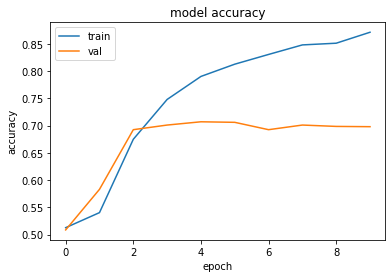

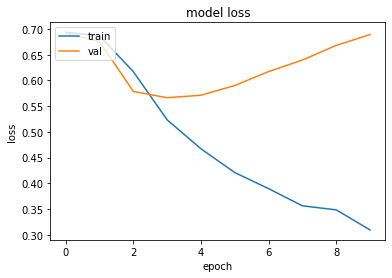

In [168]:
# summarize history for accuracy
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') 
plt.show()

# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') 
plt.show()

In [169]:
scores = modelRNN.evaluate(x_test, y_test,verbose=1)
scores[1]

90/90 [==============================] - 0s 455us/step


0.7222222089767456

### 建立 LSTM

In [170]:
modelLSTM = Sequential() #建立模型
#輸出的維度是32，希望將數字list轉換為32維度的向量
#輸入的維度是3800，也就是我們之前建立的字典是3800字
modelLSTM.add(Embedding(output_dim=32,input_dim=3800,input_length=maxlen)) 

modelLSTM .add(Dropout(0.7)) #隨機在神經網路中放棄70%的神經元，避免overfitting

# 建立LSTM層, 建立32個神經元的LSTM層
modelLSTM .add(LSTM(32)) 

# 建立隱藏層, 建立256個神經元的隱藏層
modelLSTM .add(Dense(units=256,activation='relu')) 

modelLSTM .add(Dropout(0.7))

# 建立輸出層,建立一個神經元的輸出層
modelLSTM .add(Dense(units=1,activation='sigmoid'))


In [171]:
modelLSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [172]:
modelLSTM .summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 189, 32)           121600    
_________________________________________________________________
dropout_20 (Dropout)         (None, 189, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
_______________________________________________

In [148]:
train_LSTM = modelLSTM.fit(x_train,y_train, 
         epochs=10, 
         batch_size=100,
         verbose=2,
         validation_split=0.2)

C:\Users\danie\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
 - 10s - loss: 0.6903 - accuracy: 0.5318 - val_loss: 0.6795 - val_accuracy: 0.5885
Epoch 2/10
 - 11s - loss: 0.6052 - accuracy: 0.6809 - val_loss: 0.5610 - val_accuracy: 0.7070
Epoch 3/10
 - 10s - loss: 0.5166 - accuracy: 0.7542 - val_loss: 0.5537 - val_accuracy: 0.7190
Epoch 4/10
 - 10s - loss: 0.4772 - accuracy: 0.7744 - val_loss: 0.5558 - val_accuracy: 0.7235
Epoch 5/10
 - 10s - loss: 0.4582 - accuracy: 0.7885 - val_loss: 0.5644 - val_accuracy: 0.7225
Epoch 6/10
 - 10s - loss: 0.4351 - accuracy: 0.8055 - val_loss: 0.5768 - val_accuracy: 0.7155
Epoch 7/10
 - 10s - loss: 0.4284 - accuracy: 0.8055 - val_loss: 0.5860 - val_accuracy: 0.7095
Epoch 8/10
 - 10s - loss: 0.4135 - accuracy: 0.8131 - val_loss: 0.5993 - val_accuracy: 0.7150
Epoch 9/10
 - 10s - loss: 0.3983 - accuracy: 0.8251 - val_loss: 0.6075 - val_accuracy: 0.7110
Epoch 10/10
 - 9s - loss: 0.3925 - accuracy: 0.8261 - val_loss: 0.6200 - val_accuracy: 0.7115


In [152]:
print(train_LSTM.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


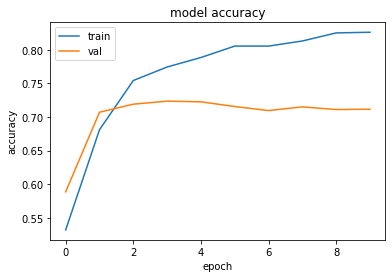

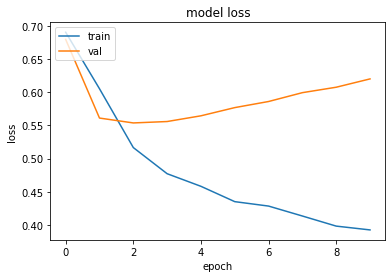

In [153]:
# summarize history for accuracy
plt.plot(train_LSTM.history['accuracy'])
plt.plot(train_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') 
plt.show()

# summarize history for loss
plt.plot(train_LSTM.history['loss'])
plt.plot(train_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') 
plt.show()

In [151]:
scores = modelLSTM.evaluate(x_test, y_test,verbose=1)
scores[1]

90/90 [==============================] - 0s 788us/step


0.7777777910232544